# EDA on Terrorism Task-2

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [12]:
data = pd.read_csv("globalterrorismdb_0718dist.csv" , encoding='latin1',low_memory=False)

In [13]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [15]:
data.shape

(181691, 135)

# Cleaning the Data

In [16]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Duration','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','ishostkid':'Host'},inplace=True)
update_data = data[['Year','Month','Day','Duration','Country','Region','city','latitude','longitude','success','suicide','AttackType','Target','Nationality','Group','Motive','Weapon_type','Killed','Wounded','Summary','Target_type','Host']]
update_data['Total Affected']= update_data['Killed'] + update_data['Wounded']

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
update_data.describe

<bound method NDFrame.describe of         Year  Month  Day  Duration             Country  \
0       1970      7    2         0  Dominican Republic   
1       1970      0    0         0              Mexico   
2       1970      1    0         0         Philippines   
3       1970      1    0         0              Greece   
4       1970      1    0         0               Japan   
...      ...    ...  ...       ...                 ...   
181686  2017     12   31         0             Somalia   
181687  2017     12   31         0               Syria   
181688  2017     12   31         0         Philippines   
181689  2017     12   31         0               India   
181690  2017     12   31         0         Philippines   

                             Region           city   latitude   longitude  \
0       Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                     North America    Mexico city  19.371887  -99.086624   
2                    Southeast Asia   

# Checking null values from the data

In [18]:
update_data.isnull().sum()

Year                   0
Month                  0
Day                    0
Duration               0
Country                0
Region                 0
city                 434
latitude            4556
longitude           4557
success                0
suicide                0
AttackType             0
Target               636
Nationality         1559
Group                  0
Motive            131130
Weapon_type            0
Killed             10313
Wounded            16311
Summary            66129
Target_type            0
Host                 178
Total Affected     16874
dtype: int64

# Visualizing  countries

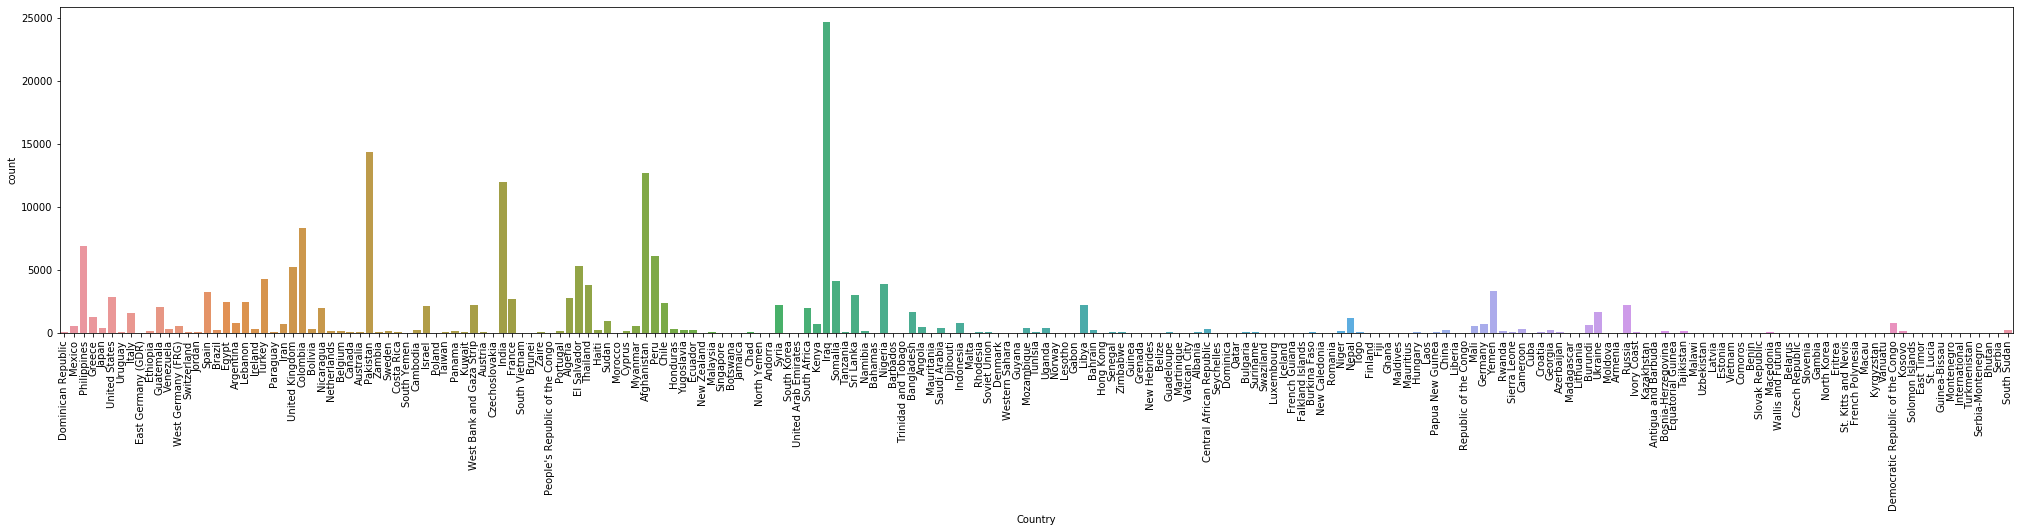

In [38]:
pd.DataFrame(update_data['Country'].value_counts().head(10))
plt.subplots(figsize=(35,6))
sns.countplot(x= update_data["Country"],data=update_data)
plt.xticks(rotation=90)
plt.show()

# Terrorism attacks be region

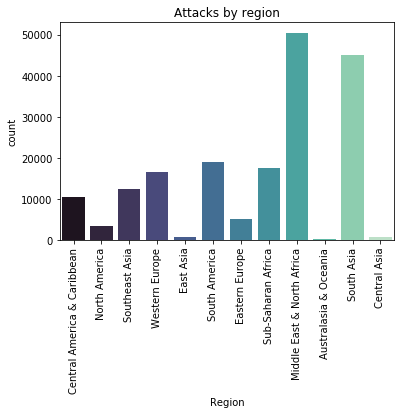

In [30]:
pd.DataFrame(update_data['Region'].value_counts())
sns.countplot('Region',data=update_data,palette='mako')
plt.title("Attacks by region")
plt.xticks(rotation=90)
plt.show()

# Successful and unsuccessful attacks

Text(0.5, 1.0, 'Year wise successful and unsuccessful attacks')

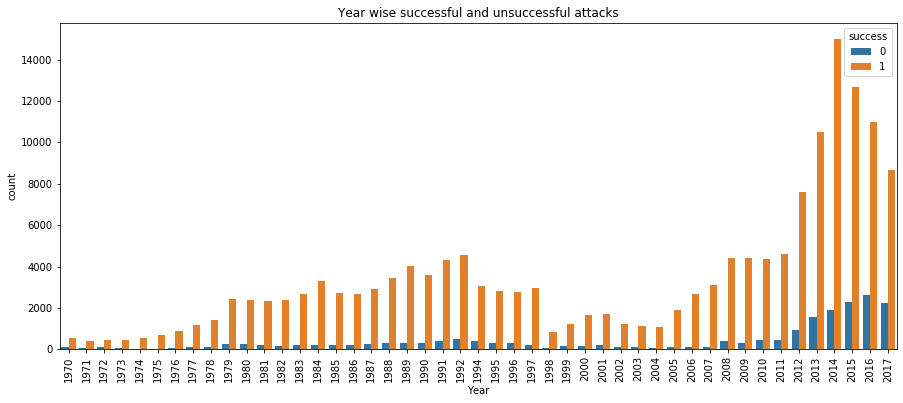

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', hue='success', data=update_data)
plt.xticks(rotation=90)
plt.title('Year wise successful and unsuccessful attacks')

# Top 10 countries Affected

Text(0.5, 1.0, 'Top 10 Affected countries')

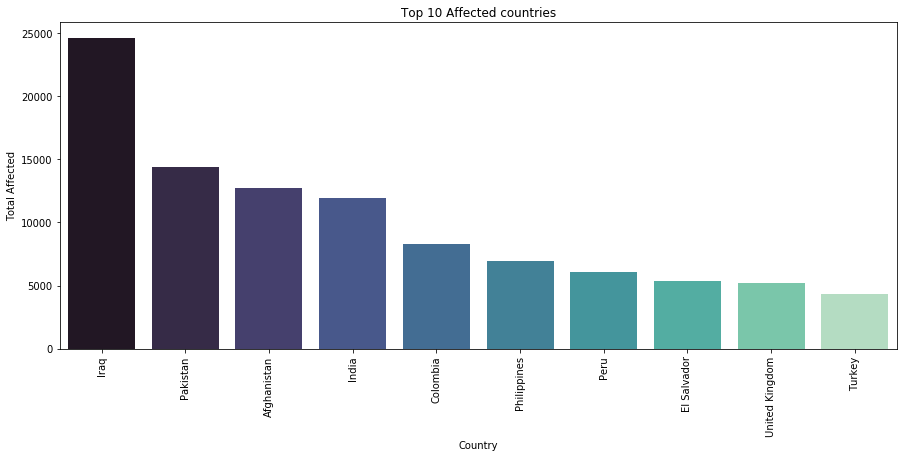

In [29]:
top_countries= update_data.Country.value_counts()[:10].reset_index()
top_countries.columns=["Country","Total Affected"]
plt.subplots(figsize=(15,6))
sns.barplot(x=top_countries.Country,y=top_countries["Total Affected"],palette='mako')
plt.xticks(rotation=90)
plt.title('Top 10 Affected countries')

# Top 10 cities affected cities terrorism

Text(0.5, 1.0, ' Top 10 Most Affected Cities')

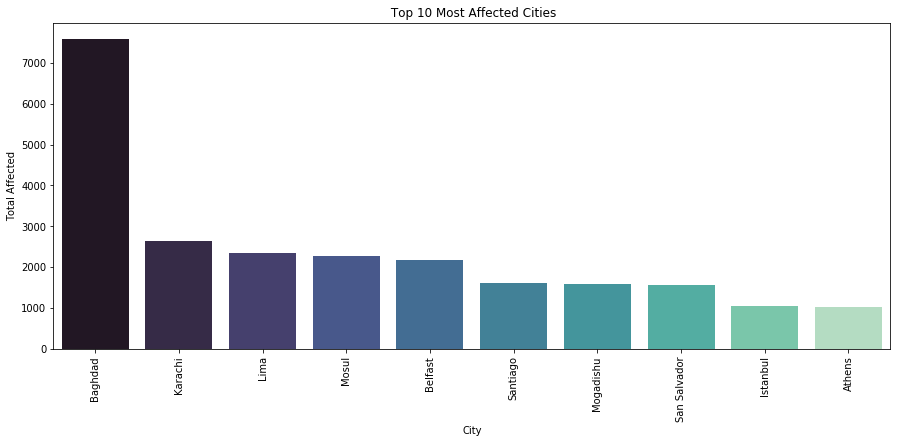

In [31]:
top_cities= update_data.city.value_counts()[:11].drop('Unknown').reset_index()
top_cities.columns=["City","Total Affected"]
plt.subplots(figsize=(15,6))
sns.barplot(x=top_cities.City,y=top_cities["Total Affected"],palette='mako')
plt.xticks(rotation=90)
plt.title(' Top 10 Most Affected Cities')

# Top Terrorist Groups

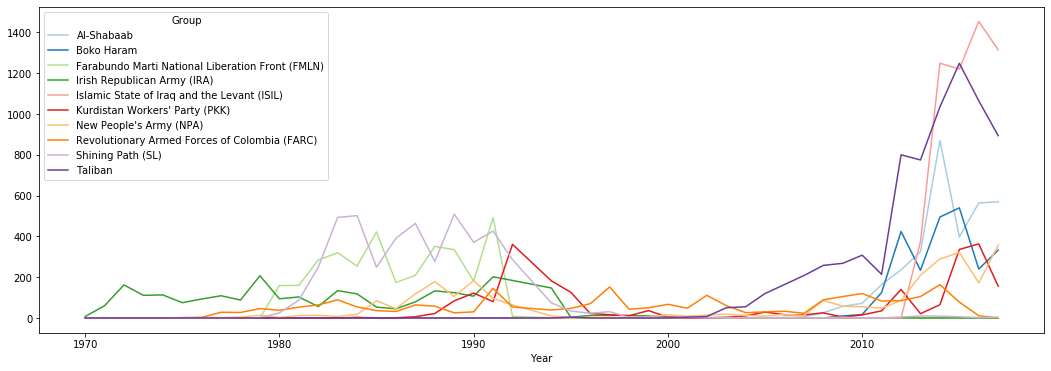

In [32]:
top_terror=update_data[update_data["Group"].isin(update_data["Group"].value_counts()[1:11].index)]
pd.crosstab(top_terror.Year,top_terror.Group).plot(color=sns.color_palette('Paired',10))
gp=plt.gcf()
gp.set_size_inches(18,6)

# Most popular type of attacks

Text(0.5, 1.0, 'Top 10 types of attack')

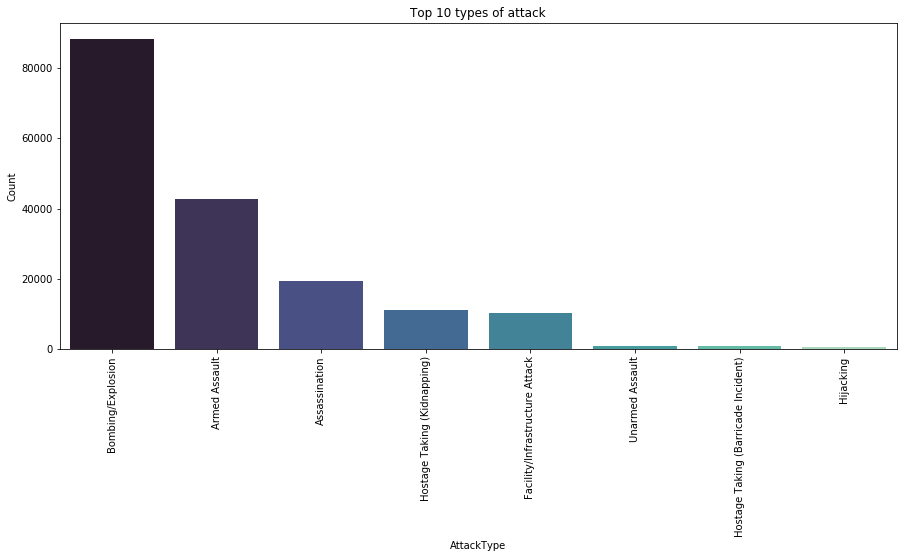

In [34]:
attack_types= update_data.AttackType.value_counts()[:10].drop('Unknown').reset_index()
attack_types.columns=["AttackType","Count"]
plt.subplots(figsize=(15,6))
sns.barplot(x=attack_types.AttackType,y=attack_types["Count"],palette='mako')
plt.xticks(rotation=90)
plt.title('Top 10 types of attack')